In [3]:
from decord import VideoReader
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def load_video(video_path, n_frms=1000000, height=-1, width=-1, sampling="uniform", clip_proposal=None):
    vr = VideoReader(uri=video_path, height=height, width=width)
    vlen = len(vr)
    n_frms = min(n_frms, vlen)
    fps = vr.get_avg_fps() 
    if clip_proposal is None:
        start, end = 0, vlen
    else:
        start, end = int(clip_proposal[0]*fps), int(clip_proposal[1]*fps)
        if start < 0:
            start = 0
        if end > vlen:
            end = vlen

    intervals = np.linspace(start=start, stop=end, num=n_frms + 1).astype(int)
    ranges = []
    for idx, interv in enumerate(intervals[:-1]):
        ranges.append((interv, intervals[idx + 1]))

    if sampling == 'random':
        indices = []
        for x in ranges:
            if x[0] == x[1]:
                indices.append(x[0])
            else:
                indices.append(rnd.choice(range(x[0], x[1])))
    elif sampling == 'uniform':
        
        indices = [(x[0] + x[1]) // 2 for x in ranges]

    elif sampling == "headtail":
        indices_h = sorted(rnd.sample(range(vlen // 2), n_frms // 2))
        indices_t = sorted(rnd.sample(range(vlen // 2, vlen), n_frms // 2))
        indices = indices_h + indices_t
    else:
        raise NotImplementedError
    
    if len(indices) < n_frms:
        rest = [indices[-1] for i in range(n_frms - len(indices))]
        indices = indices + rest 
    # get_batch -> T, H, W, C
    frms = vr.get_batch(indices)  # N, H, W, C

    return frms, indices, fps

In [5]:
video_folder = '/project/mira/dataset/MovieNet/videos/'
movie_id = 'tt0100157'
video_path = video_folder + movie_id + '.mp4'

In [6]:
n_frame = 120
frms, indices, fps = load_video(video_path=video_path, n_frms=n_frame, sampling='uniform')
frms = frms.asnumpy()
print(type(frms))
print(frms.shape)
print(len(indices))

<class 'numpy.ndarray'>
(120, 240, 442, 3)
120


In [11]:
target_indices = [
    2,
    4,
    5,
    7,
    8,
    17,
    21,
    27,
    31,
    40,
    58,
    63,
    64,
    97,
    105,
    115
]

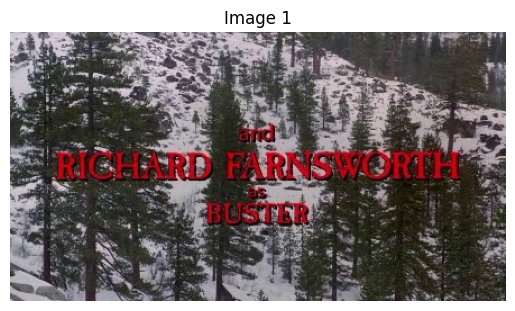

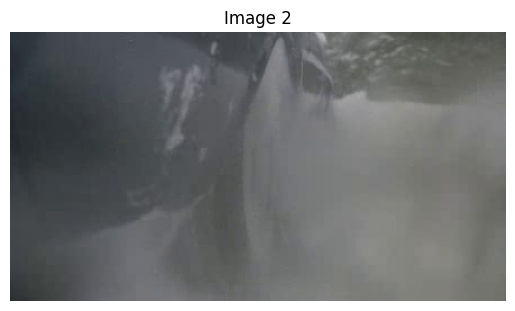

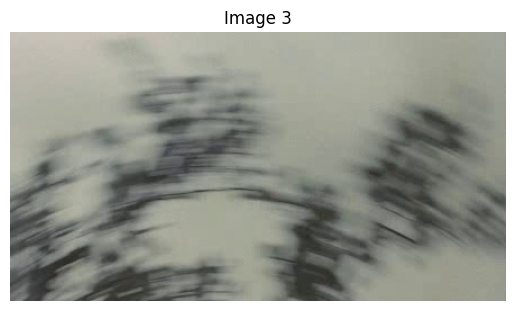

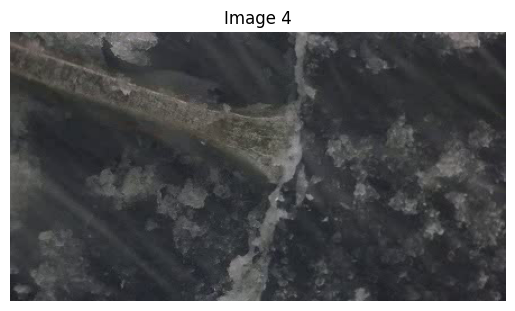

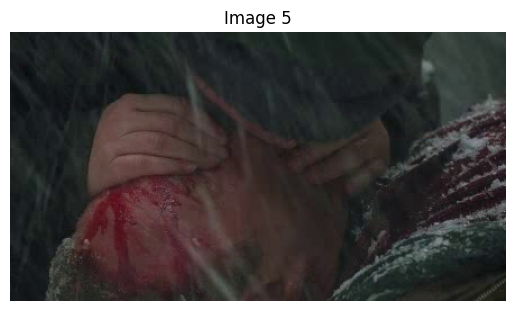

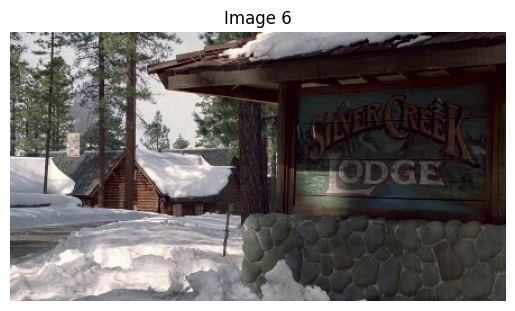

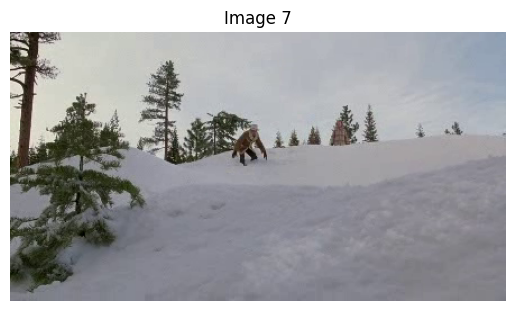

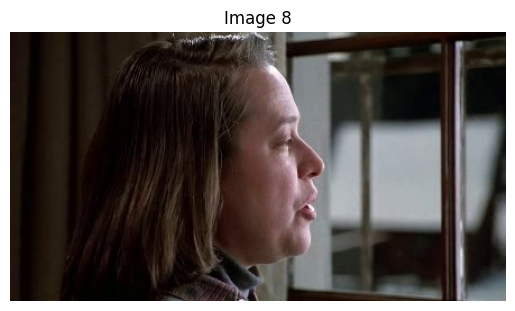

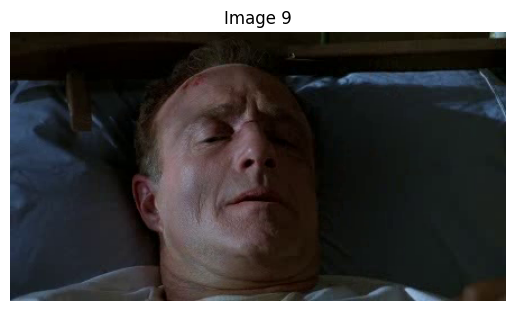

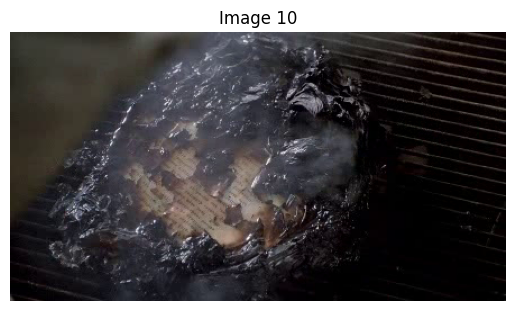

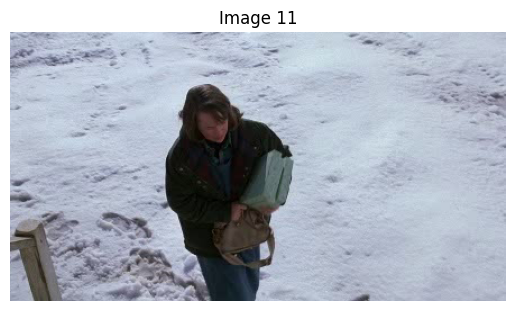

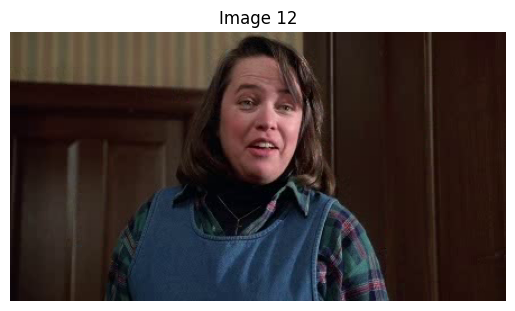

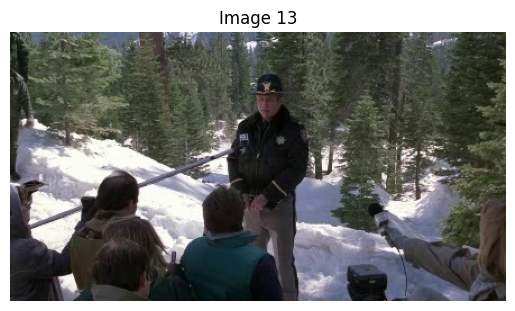

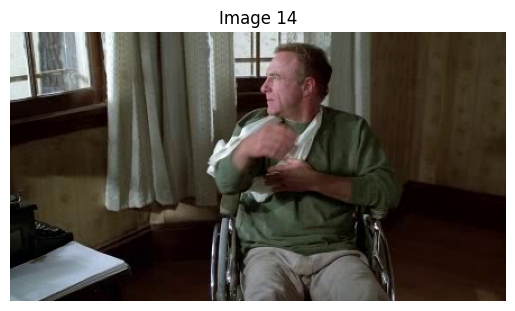

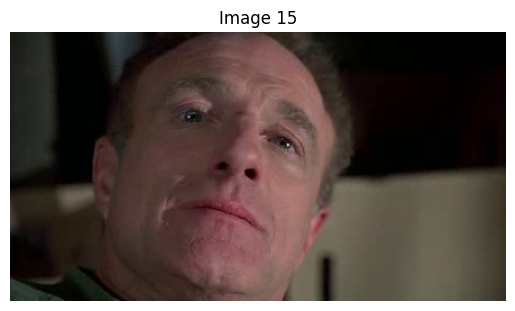

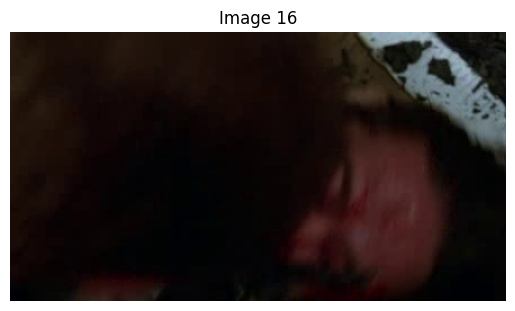

In [12]:
target_frames = frms[target_indices]
for i in range(target_frames.shape[0]):
    plt.imshow(target_frames[i])
    plt.title(f'Image {i+1}')
    plt.axis('off')
    plt.show()